# Лабораторная работа №7 "Решение дифференциальных уравнений"
### Выполнил студент 430 группы Королев Алексей
### Вариант 25

Решить дифференциальное уравнение неявным симметричным методом
$$y'''-2y''+y'-2y= e^{2x}cos(x)$$

Широкие классы задач физики, химии, биологии, экономики и др. сводится к решению начально-краевых задач для системы обыкновенных дифференциальных уравнений. Считается, что приведение задачи к форме, например, задачи Коши является гарантией ее решения, хотя бы приближенного.

Симметричная неявная схема - неустойчивая, а решение ищется в виде:
$$\frac{y_{n+1}-y_n}{h}+0.5A(y_{n+1}+y_n)=f_n, y_0=u_0, n=0,1,2,...$$

В процессе решения, ДУ 3-го порядка сначала разбивается на систему из трех уравнений,далее применяется симметричная неявная схема,

$$\frac{p_{n+1}-p_n}{h}=0.5h(2p_{n+1}-q_{n+1}+2r_{n+1}+e^{(2x_{n+1})}cos(x_{n+1})+2p_n-q_n+2r_n+e^{(2x_n)}cos(x_n)$$

$$\frac{q_{n+1}-q_n}{h}=0.5(p_{n+1}+p_n)$$

$$\frac{r_{n+1}-r_n}{h}=0.5(q_{n+1}+q_n)$$

(где p - y'', q - y', r - y)

а после, корни находятся путем иттерций.

In [1]:
import math 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [4]:
h=0.01
x=0.0
Ax = [0.0 for  J in range(200)]
Ay = [0.0 for  J in range(200)]
M = [0.0, 0.0, 0.0]
Y = [0.0, 0.0, 1.0]
A = np.array([[(1.0-h), (0.5*h), -h],[(-0.5*h), 1.0, 0.0],[0.0, (-0.5*h), 1.0]])
B = [0.0, 0.0, 0.0]
for i in range (1,201):
    x=x+h
    B[0]=(1.0-h)*Y[0]+(0.5*h*Y[1])-(h*Y[2])-(0.5*h*(math.e**(2.0*x))*(math.cos(x)))+((math.e**(2.0*(x+h)))*(math.cos(x+h)))
    B[1]=Y[1]+(0.5*h*Y[0])
    B[2]=Y[2]+(0.5*h*Y[1])
    BN=np.array(B)
    np.linalg.solve(A, BN)
    M=np.linalg.solve(A, BN)
#     print(M[1],M[2])
    Ax[i-1]=M[2]
    Ay[i-1]=M[1]
    Y[0] = M[0]
    Y[1] = M[1]
    Y[2] = M[2]

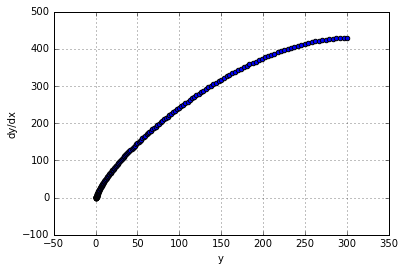

In [5]:
for J in range(0,200):
    scatter=plt.scatter(Ax[J],Ay[J])
plt.xlabel('y')
plt.ylabel('dy/dx')
plt.grid()
plt.show()